In [2]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

In [3]:
from kmeanspp import kmeanspp, compute_distance

importing Jupyter notebook from kmeanspp.ipynb
[array([1, 1]), array([8, 8]), array([-2, -2])]


### Assign points to centers

In [4]:
# Input
# centers: existing centroids
# data: numpy array containing all data points
# Output
# Array of centers corresponding to each point
def assign_centers(centers, data):
    allocated_centers = []
    num_of_rows = data.shape[0]
    num_of_centers = len(centers)
    for i in range(num_of_rows):
        point = data[i]
        final_distance = -1
        final = -1
        for j in range(num_of_centers):
            center = centers[j]
            distance = compute_distance(point, center)
            if final_distance == -1:
                final_distance = distance
                final = j
            elif distance < final_distance:
                final_distance = distance
                final = j
        allocated_centers.append(final)
    return allocated_centers

### Update Centers

In [5]:
# Input 
# K : number of clusters
# clustered_data : data grouped into K clusters
# data : numpy 2-d array containing data
# Output
# updated centers

def update_centers(K, clustered_data, data):
    dim = data.shape[1]
    sums = np.zeros(( K, dim+1), dtype = float )
    num_rows = data.shape[0]

    for i in range(num_rows):
        assigned_cluster = clustered_data[i]
        sums[assigned_cluster][-1] += 1
        for j in range(dim):
            sums[assigned_cluster][j] += data[i][j]

    for i in range(K):
        for j in range(dim):
            sums[i][j] /= sums[i][-1]

    centers = []
    for i in range(K):
        centers.append(sums[i][:-1])

    return centers

### Comparing two lists

In [6]:
# Input
# list1 and list2
# Output:
# True if list1 ~ list2 , False otherwise

def check_equality(list1, list2):
    K = len(list1)
    dim = len(list1[0])
    threshold = 1e-3

    for i in range(K):
        for j in range(dim):
            if abs(list1[i][j] - list2[i][j]) > threshold:
                return False

    return True

### Kmeans function

In [23]:
# Input 
# K : number of clusters
# data : numpy 2-d array containing data
# num_of_iteration : no. of iterations of the kmeans algo
# Output
# clustered_data : data grouped into K clusters

def kmeans(K, data, num_of_iteration = 10000):
    centers = kmeanspp(K, data)
    # centers = np.random.rand(k,data.shape[1])
    clustered_data = []
    for i in range(num_of_iteration):
        prev_centers = centers
        clustered_data = assign_centers(centers, data)
        centers = update_centers(K, clustered_data, data)
        if check_equality(prev_centers,centers):
            break
    num_rows = data.shape[0]
    
    res = []

    for i in range(num_rows):
        temp = list(data[i])
        temp.append(clustered_data[i])
        res.append(temp)
    
    return np.array(res), centers


### Testing

In [ ]:
data = np.array([[4, 5],[4,-5],[-5, 6],[5, -6],[-4, -5],[5, 4],[-5, -6],[5, 6],[5, -4],[5, 5],[5, -5],[-5, 4],[-5, -4],[-5, -5],[-4, 5],[-5, 5]])/5
K = 4
data, centers = kmeans(K, data)
print(data)
print(centers)

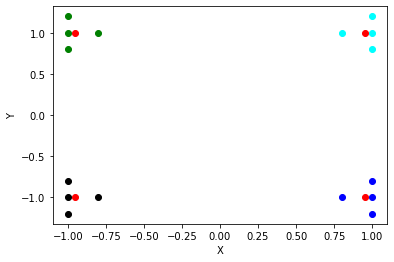

In [37]:
color=['blue','green','cyan','black']
num_rows = data.shape[0]
for i in range(num_rows):
    k = int(data[i][2]) 
    plt.scatter(data[i][0],data[i][1],c=color[k])

for i in range(K):
    plt.scatter(centers[i][0],centers[i][1],c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
df_products = pd.read_csv("df_phase9.csv",encoding="latin1")
df_products_inp = df_products.drop(["CustomerID",df_products.columns[0]],axis=1)
df_products_inp = df_products.drop(["CountryID",df_products.columns[0]],axis=1)
df_products_np = df_products_inp.to_numpy()

data, centers = kmeans(6,df_products_np)

print(data)
print(centers)

[[1.78500000e+04 0.00000000e+00 3.49559634e+01 ... 3.40000000e+01
  1.56554118e+02 0.00000000e+00]
 [1.30470000e+04 8.95342076e+00 2.86888688e+01 ... 1.00000000e+01
  3.09580000e+02 0.00000000e+00]
 [1.25830000e+04 2.00050366e+01 1.43794505e+01 ... 1.50000000e+01
  4.79156000e+02 0.00000000e+00]
 ...
 [1.32980000e+04 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  3.60000000e+02 0.00000000e+00]
 [1.45690000e+04 0.00000000e+00 1.09503496e+01 ... 1.00000000e+00
  2.27390000e+02 0.00000000e+00]
 [1.27130000e+04 1.07312474e+01 1.48135054e+01 ... 1.00000000e+00
  8.48550000e+02 0.00000000e+00]]
[array([1.53107281e+04, 1.44009750e+01, 2.16311317e+01, 1.67974917e+01,
       2.53699895e+01, 2.15159171e+01, 1.17278552e+03, 2.34658097e+02,
       4.71210102e+02, 3.57871029e+00, 3.40656541e+02]), array([ 1.63740000e+04,  6.69633975e+00,  4.31768943e+01,  1.53914741e+01,
        1.85965262e+01,  1.61387657e+01,  2.69607960e+05, -6.29000000e+01,
        2.12419600e+04,  6.75000000e+01,  4.027534

0.0


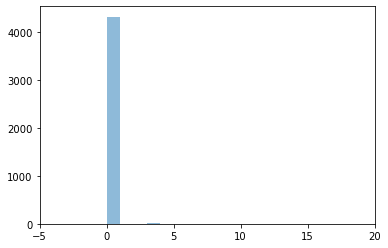

In [9]:
bins = np.arange(-100, 100, 1) # fixed bin size
print(min(data[:,-1]))
plt.xlim([min(data[:,-1])-5, 20])

plt.hist(data[:,-1], bins=bins, alpha=0.5)
plt.show()


In [31]:
print(pd.Series(data[:,-1]).value_counts())

0.0    4218
5.0     102
3.0      13
2.0       3
1.0       2
4.0       1
dtype: int64
